In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
data = pd.read_csv('./dataset/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.shape

(284807, 31)

In [4]:
# 3퍼는 fraud가 855개
print(855/len(data['Class'])*100,"%")
print(0.003 * 284315)

0.30020329556506686 %
852.945


In [5]:
# 5퍼는 fraud가 1424개
print(1424/len(data['Class'])*100,"%")
print(0.005 * 284315)

0.4999877109762049 %
1421.575


In [6]:
# 7퍼는 fraud가 1994개
print(1994/len(data['Class'])*100,"%")
print(0.007 * 284315)

0.7001232413529161 %
1990.2050000000002


Number of fraudulent transactions: 492
Number of normal transactions: 284315
Number of normal transactions: 0.1727485630620034 %


<AxesSubplot: xlabel='Class', ylabel='count'>

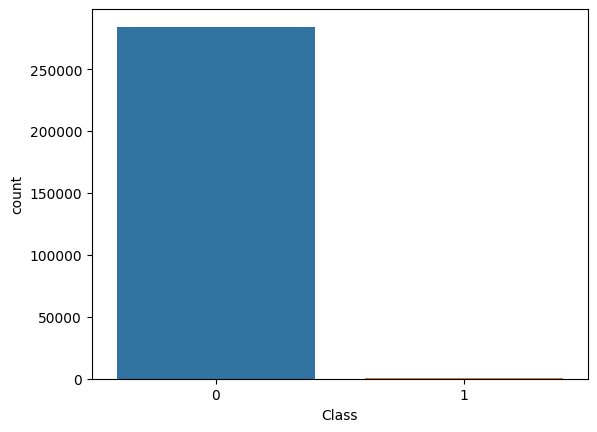

In [7]:
print("Number of fraudulent transactions:", data['Class'].sum())
print("Number of normal transactions:", len(data[data['Class']==0]))
print("Number of normal transactions:", len(data[data['Class']==1])/len(data['Class'])*100,"%")
sns.countplot(x='Class',data=data)

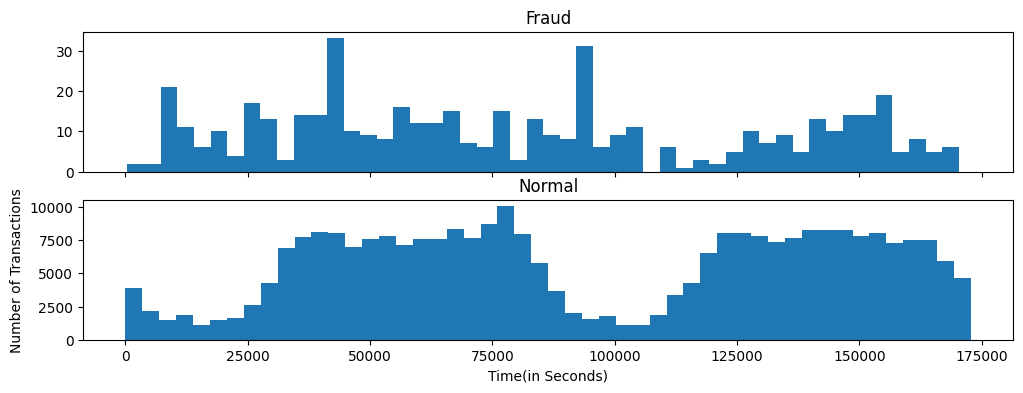

In [8]:
# 시간대별 트랜잭션 양
f, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(12,4))
ax1.hist(data.Time[data.Class==1], bins=50)
ax2.hist(data.Time[data.Class==0], bins=50)

ax1.set_title('Fraud')
ax2.set_title('Normal')
plt.xlabel('Time(in Seconds)'); plt.ylabel('Number of Transactions')
plt.show()

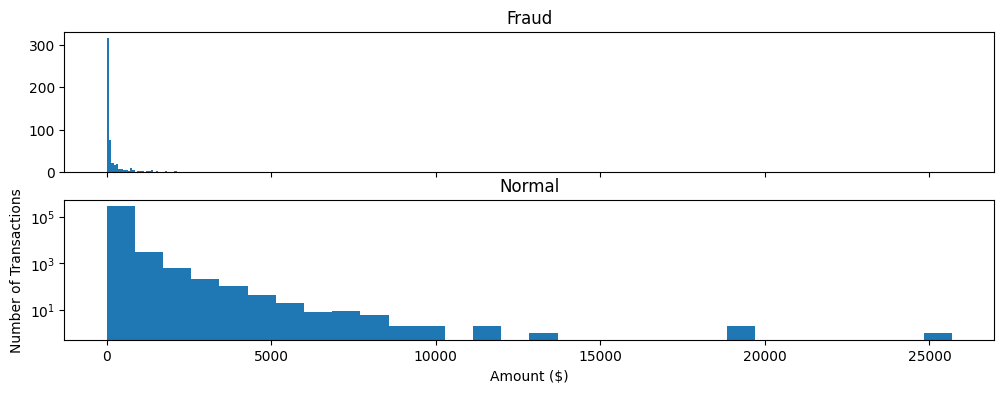

In [9]:
# 금액대별 트랜잭션 양
f, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(12,4))
ax1.hist(data.Amount[data.Class==1], bins=30)
ax2.hist(data.Amount[data.Class==0], bins=30)
ax1.set_title('Fraud')
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

# CTGAN으로 synthetic data 생성
https://github.com/sdv-dev/CTGAN

In [10]:
from ctgan import CTGAN

In [11]:
real_data = data[data['Class']==1]

# Names of the columns that are discrete
discrete_columns = [
    'Amount',
    'Time',
    'Class'
]

ctgan = CTGAN(epochs=10)
ctgan.fit(real_data, discrete_columns)

### 이상치 3%

In [12]:
# Create synthetic data
synthetic_data = ctgan.sample(363)

In [13]:
data3= pd.concat([data,synthetic_data]).sort_values(['Time'])
data3.to_csv("./dataset/new_credit/data3.csv")
data3.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Number of fraudulent transactions: 855
Number of normal transactions: 284315
Number of normal transactions: 0.2998211593084827 %


<AxesSubplot: xlabel='Class', ylabel='count'>

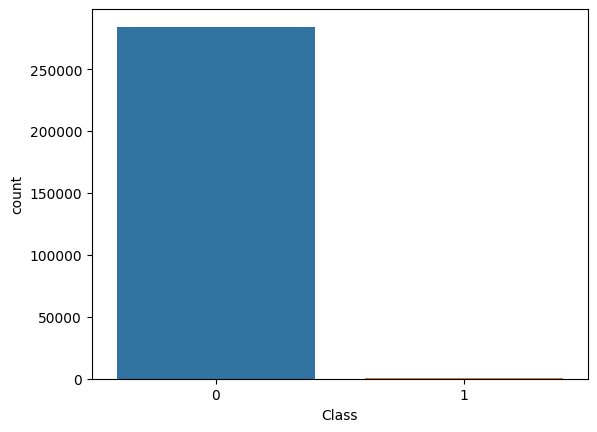

In [18]:
print("Number of fraudulent transactions:", data3['Class'].sum())
print("Number of normal transactions:", len(data3[data3['Class']==0]))
print("Number of normal transactions:", len(data3[data3['Class']==1])/len(data3['Class'])*100,"%")
sns.countplot(x='Class',data=data3)

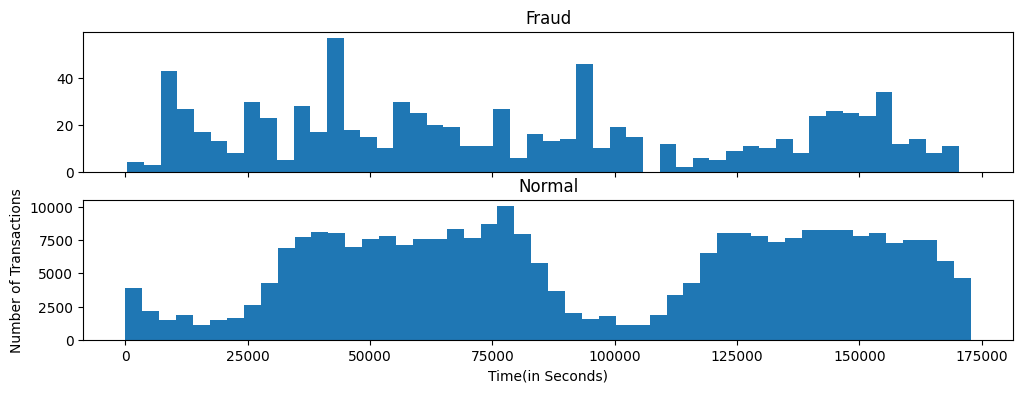

In [21]:
# 시간대별 트랜잭션 양
f, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(12,4))
ax1.hist(data3.Time[data3.Class==1], bins=50)
ax2.hist(data3.Time[data3.Class==0], bins=50)

ax1.set_title('Fraud')
ax2.set_title('Normal')
plt.xlabel('Time(in Seconds)'); plt.ylabel('Number of Transactions')
plt.show()

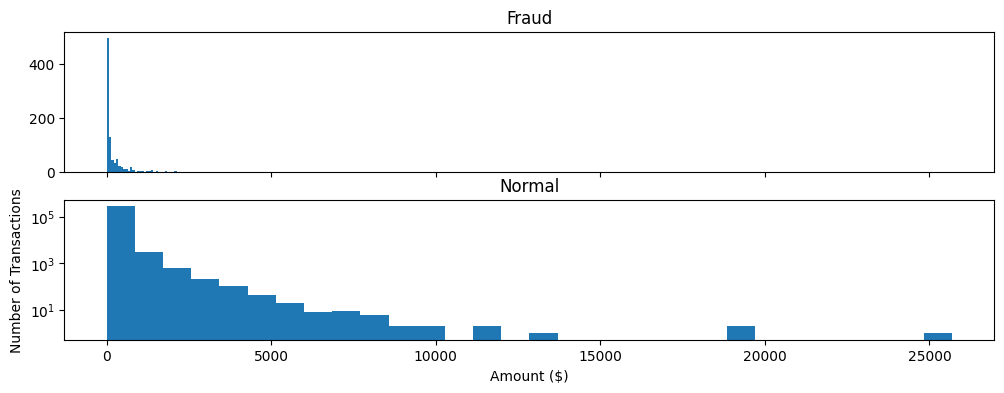

In [22]:
# 금액대별 트랜잭션 양
f, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(12,4))
ax1.hist(data3.Amount[data3.Class==1], bins=30)
ax2.hist(data3.Amount[data3.Class==0], bins=30)
ax1.set_title('Fraud')
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

### 이상치 5%

In [14]:
synthetic_data = ctgan.sample(932)

In [15]:
data5 = pd.concat([data,synthetic_data]).sort_values(['Time'])
data5.to_csv("./dataset/new_credit/data5.csv")
data5.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Number of fraudulent transactions: 1424
Number of normal transactions: 284315
Number of normal transactions: 0.49835689212883083 %


<AxesSubplot: xlabel='Class', ylabel='count'>

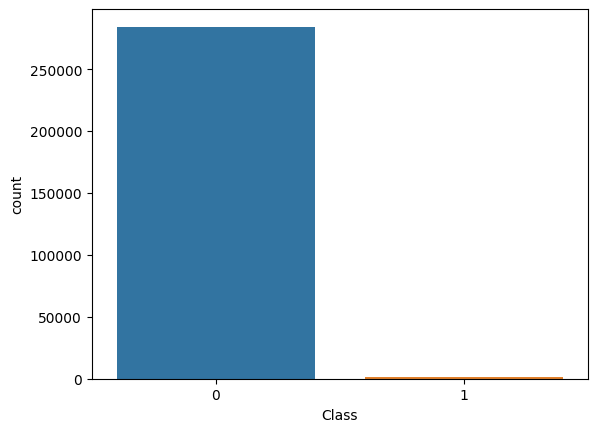

In [19]:
print("Number of fraudulent transactions:", data5['Class'].sum())
print("Number of normal transactions:", len(data5[data5['Class']==0]))
print("Number of normal transactions:", len(data5[data5['Class']==1])/len(data5['Class'])*100,"%")
sns.countplot(x='Class',data=data5)

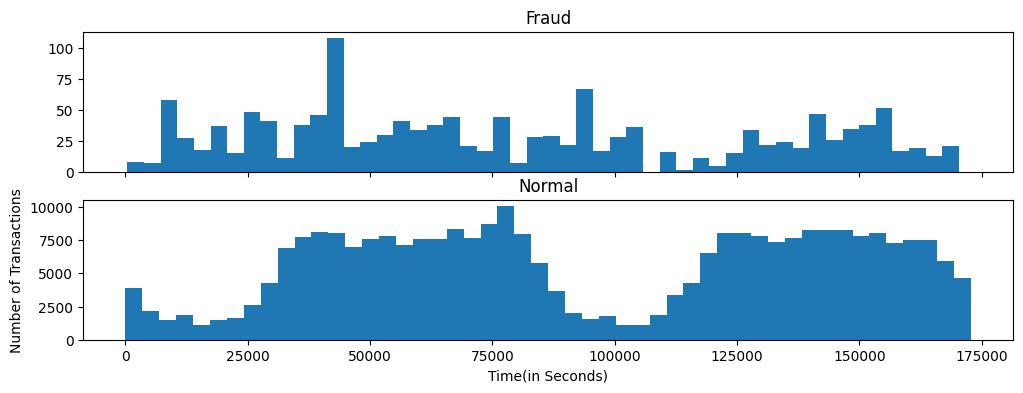

In [23]:
# 시간대별 트랜잭션 양
f, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(12,4))
ax1.hist(data5.Time[data5.Class==1], bins=50)
ax2.hist(data5.Time[data5.Class==0], bins=50)

ax1.set_title('Fraud')
ax2.set_title('Normal')
plt.xlabel('Time(in Seconds)'); plt.ylabel('Number of Transactions')
plt.show()

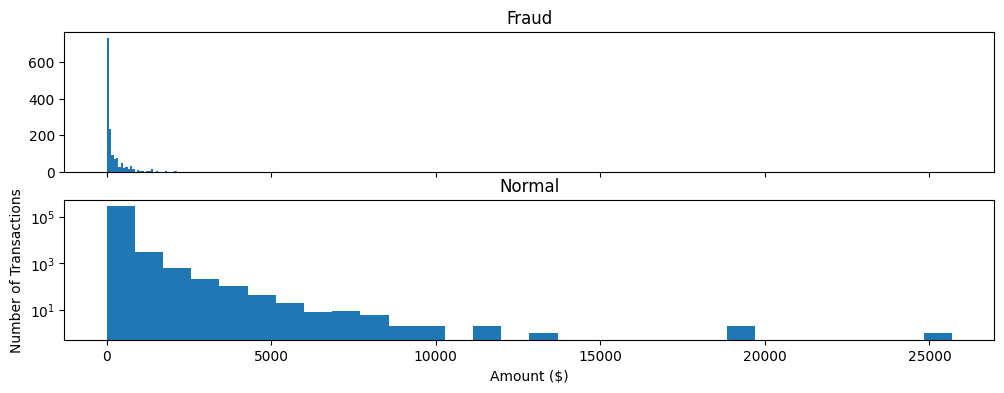

In [24]:
# 금액대별 트랜잭션 양
f, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(12,4))
ax1.hist(data5.Amount[data5.Class==1], bins=30)
ax2.hist(data5.Amount[data5.Class==0], bins=30)
ax1.set_title('Fraud')
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

### 이상치 7%

In [16]:
synthetic_data = ctgan.sample(1502)

In [17]:
data7 = pd.concat([data,synthetic_data]).sort_values(['Time'])
data7.to_csv("./dataset/new_credit/data7.csv")
data7.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Number of fraudulent transactions: 1994
Number of normal transactions: 284315
Number of normal transactions: 0.6964503386201621 %


<AxesSubplot: xlabel='Class', ylabel='count'>

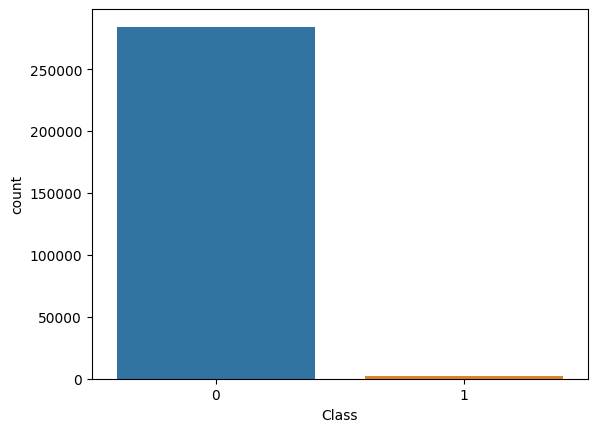

In [20]:
print("Number of fraudulent transactions:", data7['Class'].sum())
print("Number of normal transactions:", len(data7[data7['Class']==0]))
print("Number of normal transactions:", len(data7[data7['Class']==1])/len(data7['Class'])*100,"%")
sns.countplot(x='Class',data=data7)

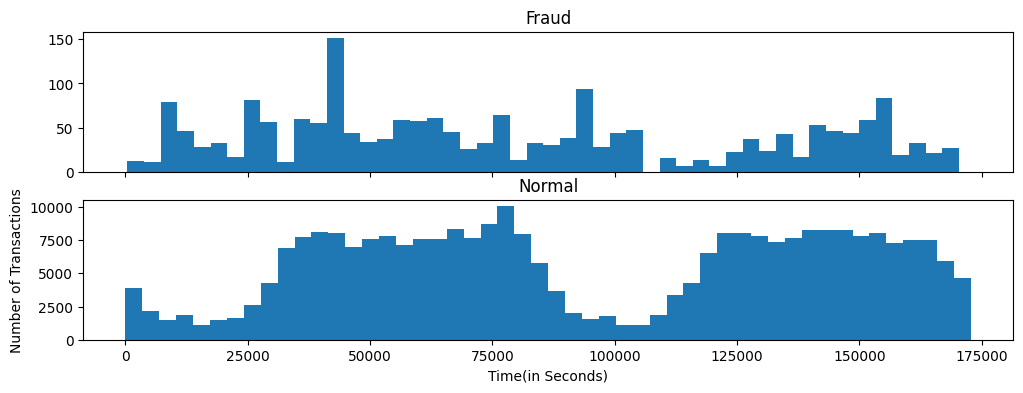

In [25]:
# 시간대별 트랜잭션 양
f, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(12,4))
ax1.hist(data7.Time[data7.Class==1], bins=50)
ax2.hist(data7.Time[data7.Class==0], bins=50)

ax1.set_title('Fraud')
ax2.set_title('Normal')
plt.xlabel('Time(in Seconds)'); plt.ylabel('Number of Transactions')
plt.show()

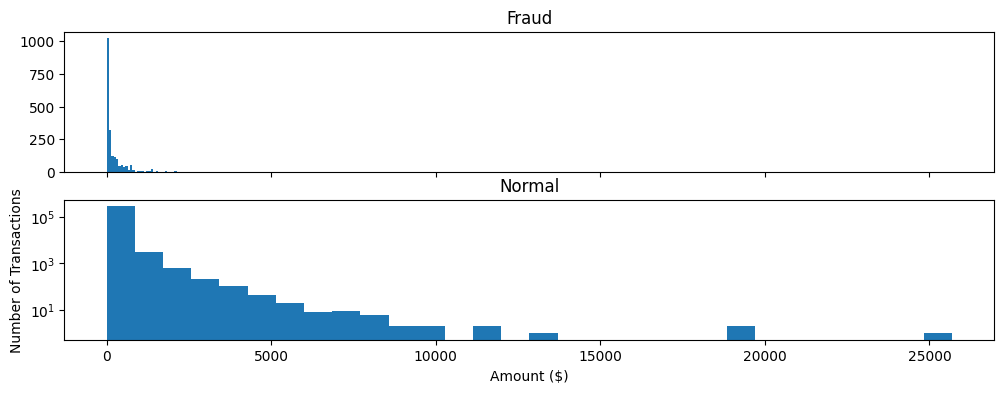

In [26]:
# 금액대별 트랜잭션 양
f, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(12,4))
ax1.hist(data7.Amount[data7.Class==1], bins=30)
ax2.hist(data7.Amount[data7.Class==0], bins=30)
ax1.set_title('Fraud')
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()